<a href="https://colab.research.google.com/github/chinmayhandi/CIE-01/blob/main/CIE_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv("/content/drive/MyDrive/Datasets/Mall_Customers.csv")
data.head()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = data.iloc[:, [3, 4]].values

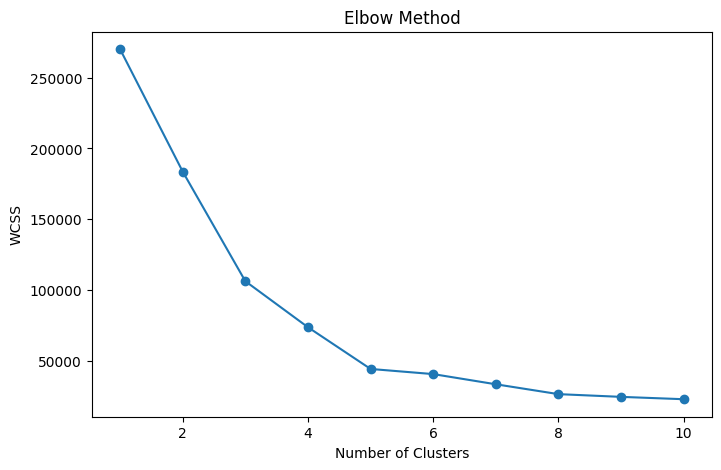

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_pre = kmeans.fit_predict(X)

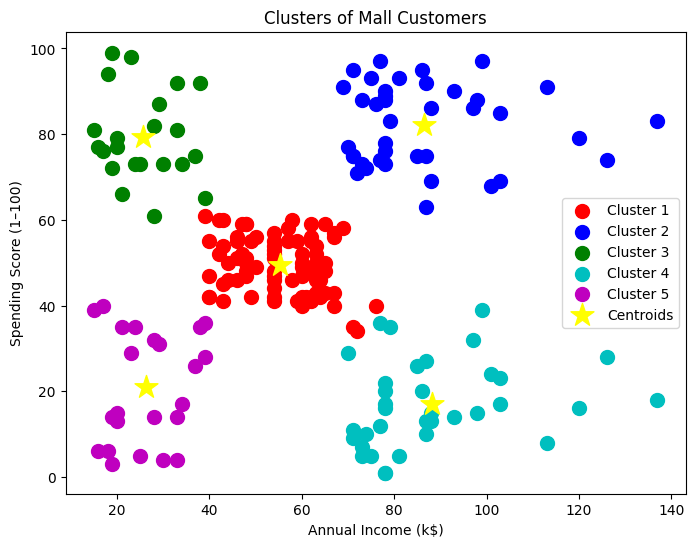

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[y_pre == 0, 0], X[y_pre == 0, 1], s=100, c='r', label='Cluster 1')
plt.scatter(X[y_pre == 1, 0], X[y_pre == 1, 1], s=100, c='b', label='Cluster 2')
plt.scatter(X[y_pre == 2, 0], X[y_pre == 2, 1], s=100, c='g', label='Cluster 3')
plt.scatter(X[y_pre == 3, 0], X[y_pre == 3, 1], s=100, c='c', label='Cluster 4')
plt.scatter(X[y_pre == 4, 0], X[y_pre == 4, 1], s=100, c='m', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=300, c='yellow', marker='*', label='Centroids')

plt.title("Clusters of Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.show()